In [254]:
import pandas as pd


In [255]:
treino = pd.read_csv("train.csv")
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [256]:
treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [257]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [258]:
teste = pd.read_csv("test.csv")
teste.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


In [259]:
teste.isnull().sum().sort_values(ascending=False).head(5)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
dtype: int64

In [260]:
#existem colunas com valores nulos na base de teste que não são os mesmo da base de treino

In [261]:
treino.isnull().sum().sort_values(ascending=False).head(5)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
dtype: int64

In [262]:
treino.shape

(891, 12)

In [263]:
treino.head(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [264]:
#verificar a cardianalidade dos dados
treino.nunique().sort_values()

Survived         2
Sex              2
Pclass           3
Embarked         3
SibSp            7
Parch            7
Age             88
Cabin          147
Fare           248
Ticket         681
PassengerId    891
Name           891
dtype: int64

In [265]:
treino = treino.drop(["Name","Ticket","Cabin"],axis=1)

In [266]:
teste = teste.drop(["Name","Ticket","Cabin"],axis=1)

In [267]:
#Verificar a média de idade dos passageiros
treino.Age.mean()

29.69911764705882

In [268]:
treino.loc[treino.Age.isnull(),"Age"] = treino.Age.mean()

In [269]:
teste.Age.mean()

30.272590361445783

In [270]:
teste.loc[teste.Age.isnull(),"Age"] = teste.Age.mean()

In [271]:
treino.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [272]:
treino.loc[treino.Embarked.isnull(),"Embarked"] = treino.Embarked.mode()[0]

In [273]:
teste.loc[teste.Fare.isnull(),"Fare"] = teste.Fare.mean()

In [274]:
treino.isnull().sum().sort_values(ascending = False).head()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
dtype: int64

In [275]:
teste.isnull().sum().sort_values(ascending = False).head()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
dtype: int64

In [276]:
treino.columns[treino.dtypes =="object"]

Index(['Sex', 'Embarked'], dtype='object')

In [277]:
treino.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [278]:
treino.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [279]:
#Fazer uma codificação
treino["MaleCheck"] = treino.Sex.apply(lambda x: 1 if x=="male" else 0) 

In [280]:
treino[["Sex", "MaleCheck"]].value_counts()

Sex     MaleCheck
male    1            577
female  0            314
dtype: int64

In [281]:
teste["MaleCheck"] = treino.Sex.apply(lambda x: 1 if x=="male" else 0) 

In [282]:
teste[["Sex", "MaleCheck"]].value_counts()

Sex     MaleCheck
male    1            164
        0            102
female  1             94
        0             58
dtype: int64

In [283]:
#Verificar a escala das variaveis 
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler


In [284]:
transformer = RobustScaler().fit(treino[['Age','Fare']])


In [285]:
treino[['Age','Fare']] = transformer.transform(treino[['Age','Fare']])

In [286]:
transformer = RobustScaler().fit(teste[['Age','Fare']])
teste[['Age','Fare']] = transformer.transform(teste[['Age','Fare']])


In [287]:
#Tentando achar algumas relações 
SibSp_df = treino.groupby("SibSp")["Survived"].agg(["sum","count","mean"]).reset_index()
SibSp_df.columns = ['SibSp','sobrev','total','tx_sobrev']

SibSp_df

,SibSp,sobrev,total,tx_sobrev
0,0,210,608,0.345395
1,1,112,209,0.535885
2,2,13,28,0.464286
3,3,4,16,0.250000
4,4,3,18,0.166667
5,5,0,5,0.000000
6,8,0,7,0.000000


In [288]:
Parch_df = treino.groupby('Parch')['Survived'].agg(['sum','count','mean']).reset_index()

Parch_df.columns = ['Parch','sobrev','total','tx_sobrev']

Parch_df

,Parch,sobrev,total,tx_sobrev
0,0,233,678,0.343658
1,1,65,118,0.550847
2,2,40,80,0.500000
3,3,3,5,0.600000
4,4,0,4,0.000000
5,5,1,5,0.200000
6,6,0,1,0.000000


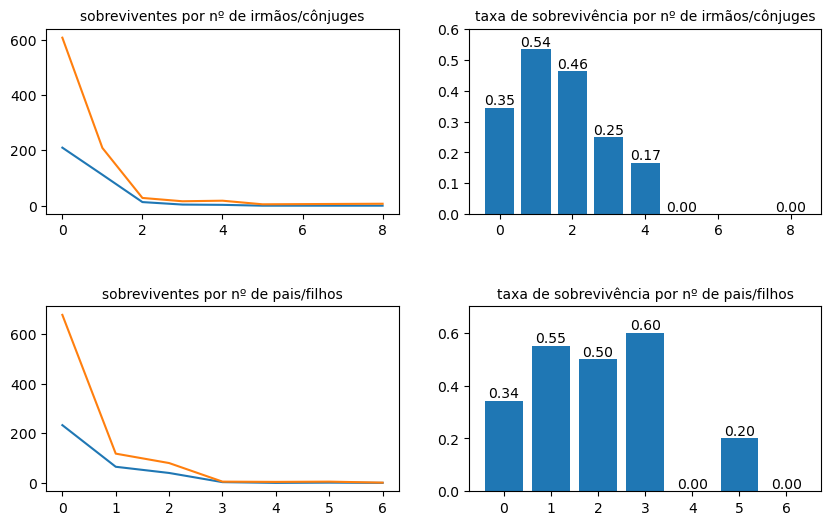

In [289]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,6))

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.sobrev)

ax[0,0].plot(SibSp_df.SibSp, SibSp_df.total)

ax[0,0].set_title('sobreviventes por nº de irmãos/cônjuges', fontsize=10)

labels1 = ax[0,1].bar(SibSp_df.SibSp, SibSp_df.tx_sobrev)

ax[0,1].bar_label(labels1,fmt="%.02f")

ax[0,1].set(ylim=(0,0.6))

ax[0,1].set_title('taxa de sobrevivência por nº de irmãos/cônjuges', fontsize=10)

ax[1,0].plot(Parch_df.Parch, Parch_df.sobrev)

ax[1,0].plot(Parch_df.Parch, Parch_df.total)

ax[1,0].set_title('sobreviventes por nº de pais/filhos', fontsize=10)

labels2 = ax[1,1].bar(Parch_df.Parch, Parch_df.tx_sobrev)

ax[1,1].bar_label(labels2,fmt="%.02f")

ax[1,1].set(ylim=(0,0.7))

ax[1,1].set_title('taxa de sobrevivência por nº de pais/filhos', fontsize=10)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [290]:
# Criando uma função para verificar se os dois valores são vazios

def sozinho(a,b):

    if (a == 0 and b == 0):

        return 1

    else:

        return 0

# Aplicando essa função na base de treino

treino['Sozinho'] = treino.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

# Verificando os valores nessa coluna

treino.groupby('Sozinho')[['SibSp','Parch']].mean()

,SibSp,Parch
Sozinho,,
0,1.316384,0.960452
1,0.000000,0.000000


In [291]:
# Fazendo o mesmo para a base de teste

teste['Sozinho'] = teste.apply(lambda x: sozinho(x.SibSp,x.Parch),axis=1)

#Podemos também criar uma coluna “Familiares” verificando o total de familiares a bordo

# Criando para a base de treino

treino['Familiares'] = treino.SibSp + treino.Parch

# E para a base de teste

teste['Familiares'] = treino.SibSp + treino.Parch

# Verificando a sobrevivência para Familiares

Familiares_df = treino.groupby('Familiares')['Survived'].agg(['sum','count','mean']).reset_index()

Familiares_df.columns = ['Familiares','sobrev','total','tx_sobrev']

Familiares_df

,Familiares,sobrev,total,tx_sobrev
0,0,163,537,0.303538
1,1,89,161,0.552795
2,2,59,102,0.578431
3,3,21,29,0.724138
4,4,3,15,0.200000
5,5,3,22,0.136364
6,6,4,12,0.333333
7,7,0,6,0.000000
8,10,0,7,0.000000


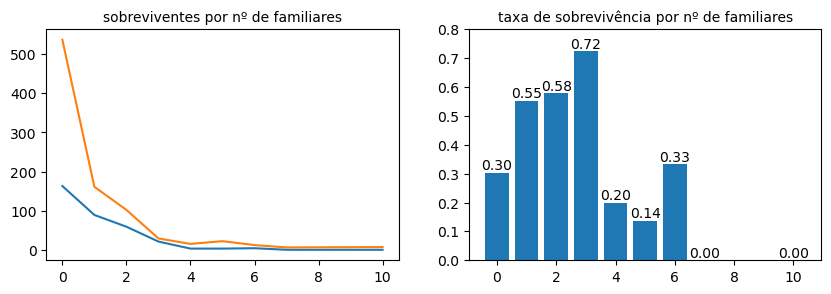

In [292]:
# Visualizando a informação de familiares

fig, ax = plt.subplots(ncols=2,figsize=(10,3))

ax[0].plot(Familiares_df.Familiares, Familiares_df.sobrev)

ax[0].plot(Familiares_df.Familiares, Familiares_df.total)

ax[0].set_title('sobreviventes por nº de familiares', fontsize=10)

labels1 = ax[1].bar(Familiares_df.Familiares, Familiares_df.tx_sobrev)

ax[1].bar_label(labels1,fmt="%.02f")

ax[1].set(ylim=(0,0.8))

ax[1].set_title('taxa de sobrevivência por nº de familiares', fontsize=10)

plt.show()

In [293]:
col_treino_nr = treino.columns[treino.dtypes != "object"]
col_treino_nr

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'MaleCheck', 'Sozinho', 'Familiares'],
      dtype='object')

In [294]:
treino_nr = treino.loc[:,col_treino_nr]


In [295]:
col_teste_nr = teste.columns[teste.dtypes != "object"]
col_teste_nr

Index(['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'MaleCheck',
       'Sozinho', 'Familiares'],
      dtype='object')

In [296]:
from sklearn.model_selection import train_test_split

In [297]:
teste_nr = teste.loc[:,col_teste_nr]

In [298]:
# x é a base de trino retirando a coluna que eu quero prever
X =treino_nr.drop(['PassengerId','Survived'], axis=1)

y=treino.Survived

In [299]:
#dividir em treino e validação 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [300]:
from sklearn import tree

In [301]:
#Criando o classificador
clf_ac = tree.DecisionTreeClassifier(random_state=42)

In [302]:
#Fazendo o fit com os Dados
clf_ac = clf_ac.fit(X_train,y_train)


In [303]:
#Fazendo a previsão
y_pred_ac = clf_ac.predict(X_val)


In [304]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [305]:
clf_knn = KNeighborsClassifier(n_neighbors=3)

In [306]:
clf_knn = clf_knn.fit(X_train,y_train)


In [307]:
y_pred_knn = clf_knn.predict(X_val)

In [308]:
#Regressão Logistica
from sklearn.linear_model import LogisticRegression


In [309]:
clf_rl = LogisticRegression(random_state=42)

In [310]:
clf_rl = clf_rl.fit(X_train,y_train)


In [311]:
y_pred_rl = clf_rl.predict(X_val)

In [312]:
from sklearn.metrics import accuracy_score

In [313]:
#arvores
arv =accuracy_score(y_val, y_pred_ac)

In [314]:
#krn
krn = accuracy_score(y_val, y_pred_knn)

In [315]:
#regressão logistica
Rl =accuracy_score(y_val, y_pred_rl)

In [316]:
ML_df = pd.DataFrame ({
    "modelos": ["arvore", "Knr", "Rl"],
    "valores" : [arv, krn,Rl]
})

ML_df

,modelos,valores
0,arvore,0.745763
1,Knr,0.783051
2,Rl,0.813559


In [317]:
X_train.head(3)

,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares
6,1,1.869299,0,0,1.620136,1,1,0
718,3,0.000000,0,0,0.045293,1,1,0
685,2,-0.361471,1,2,1.174771,1,0,3


In [318]:
teste_nr.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,MaleCheck,Sozinho,Familiares
0,892,3,0.331562,0,0,-0.280670,1,1,1
1,893,3,1.311954,1,0,-0.315800,0,0,1
2,894,2,2.488424,0,0,-0.201943,0,1,0


In [319]:
X_teste = teste_nr.drop("PassengerId",axis=1)


In [320]:

teste['Survived'] = y_pred

In [321]:
teste

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,MaleCheck,Sozinho,Familiares,Survived
0,892,3,male,0.331562,0,0,-0.280670,Q,1,1,1,0
1,893,3,female,1.311954,1,0,-0.315800,S,0,0,1,0
2,894,2,male,2.488424,0,0,-0.201943,Q,0,1,0,0
3,895,3,male,-0.256674,0,0,-0.245367,S,0,1,1,0
4,896,3,female,-0.648831,1,1,-0.091793,S,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,male,0.000000,0,0,-0.271316,S,1,1,0,0
414,1306,1,female,0.684503,0,0,4.001229,C,1,1,0,1
415,1307,3,male,0.645287,0,0,-0.305208,S,0,1,0,0
416,1308,3,male,0.000000,0,0,-0.271316,S,0,1,2,0
